<a href="https://colab.research.google.com/github/Lily10938001/practice_for_DNN/blob/main/Colab%E5%AF%A6%E4%BD%9C%EF%BC%9A%E5%BB%BA%E7%AB%8B%E4%BD%A0%E7%9A%84%E7%AC%AC%E4%B8%80%E5%80%8B%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3004/logos/header.png"
  />
  <center>MNIST 手寫數字資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

## 1: 切換 TensorFlow 至 2.x 版



In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf

In [ ]:
tf.__version__ # 確認 TensorFlow 版本

'2.17.0'

## 2: 載入套件及資料集

In [4]:
%matplotlib inline
# Import useful packages
import matplotlib.pyplot as plt
import numpy as np

# Import functions for data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## 3: 資料前處理 (Data Preprocessing)

### 讀取 MNIST 資料集

我們在此透過 `datasets` 讀取 MNIST 手寫數字圖片資料集

此外，`datasets` 提供了以下數據資料集，並可使用在各種模型的練習上
* CIFAR-10: 10 個類別的小影像分類資料集
* CIFAR-100: 100 個類別的小影像分類資料集
* IMDB: 電影評論情感分類數據集
* Reuters newswire topics: 路透社新聞標題分類
* MNIST: 手寫數字資料集
* Fashion MNIST: 時尚物品資料集
* Boston housing: 波士頓房價資料集

關於各資料集的格式與出處，可參考: https://keras.io/datasets/


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape # 6 萬筆 28x28 的資料

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape # 6 萬個整數，代表對應資料的號碼

(60000,)

In [ ]:
set(y_train) # 檢查y的所有值

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### 資料標準化 (Normalizing data)
* a) 確認資料的數值範圍
* b) 標準化至指定範圍



[重點] 標準化的資料能協助神經網路的訓練速度及穩定度

#### 觀察單筆資料

In [ ]:
# Random pick one data from training set
idx = np.random.randint(X_train.shape[0])
sample_x = X_train[idx]
sample_y = y_train[idx]

In [ ]:
sample_y

8

In [ ]:
print("最小值:", sample_x.min())
print("最大值:", sample_x.max())

最小值: 0
最大值: 255


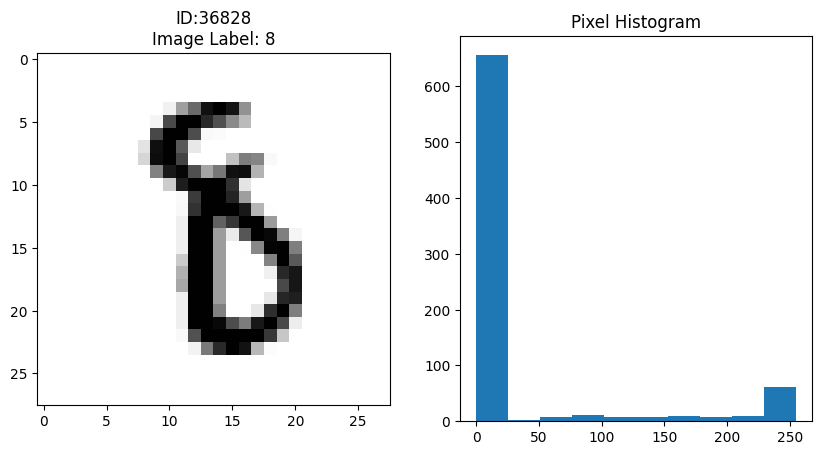

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_x, 'gray_r')
plt.title("ID:%d\nImage Label: %d" %(idx, sample_y))

plt.subplot(1, 2, 2)
plt.hist(sample_x.flatten())
plt.title("Pixel Histogram");

#### 檢查所有資料的值之範圍

In [ ]:
print("最小值:", X_train.min())
print("最大值:", X_train.max())

最小值: 0
最大值: 255


(array([ 5999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 54001.]),
 array([254. , 254.1, 254.2, 254.3, 254.4, 254.5, 254.6, 254.7, 254.8,
        254.9, 255. ]),
 <BarContainer object of 10 artists>)

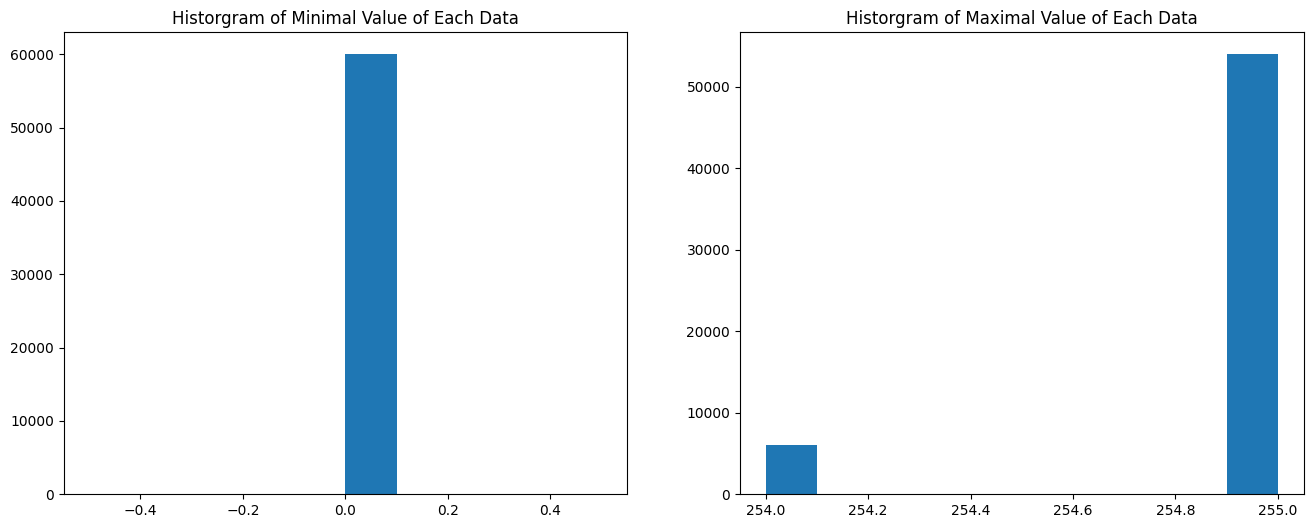

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Historgram of Minimal Value of Each Data')
plt.hist(X_train.min(axis=(1, 2)))

plt.subplot(1, 2, 2)
plt.title('Historgram of Maximal Value of Each Data')
plt.hist(X_train.max(axis=(1, 2)))

#### 標準化 (Normalization)

在數學中，將資料「單位化」的方式有很多，最常見的是限制資料數值的範圍（即最大值與最小值），假設資料的數值範圍為 $[a, b]$，透過

$$
f(x) = \frac{x-a}{b-a}
$$

可將資料的數值範圍變換到 $[0, 1]$.

在這裡，由於 MNIST 的數值範圍的最小值為 0，所以在這邊只需除以最大值 255，就可將資料的數值範圍限制在 $[0, 1]$.


In [ ]:
X_train = X_train / X_train.max()
print("最小值:", X_train.min())
print("最大值:", X_train.max())

最小值: 0.0
最大值: 1.0


In [ ]:
X_test = X_test / X_test.max()
print("最小值:", X_test.min())
print("最大值:", X_test.max())

最小值: 0.0
最大值: 1.0


### 調整資料格式
我們通常會透過 `.reshpe` 的方式，將資料「尺寸」轉換成符合神經網路輸入的格式

我們將每筆格式為 $28\times28$ 的資料，拉直 (flatten) 成一個長度為 $28*28=784$ 的一維陣列。

換言之，訓練資料的大小將從 $(60000, 28, 28)$ 轉換成 $(60000, 784)$。

測試資料則由 $(10000, 28, 28)$ 轉換成 $(10000, 784)$


In [ ]:
X_train = X_train.reshape(-1, 28*28)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape(-1, 28*28)

In [ ]:
X_test.shape

(10000, 784)

### 調整類別的格式
在分類問題上，我們會將不具有「順序」的類別，轉換成適當的格式，其中一種常見的方式稱作單熱編碼 (one-hot encoding)；我們先看下面的例子：

假設我們有三個類別: 蘋果、香蕉、貓

透過單熱編碼，我們會將每個類別其轉換成長度為類別總數的向量，其結果如下：

| 蘋果 | 香蕉 | 貓 |
|-------|--------|-----|
|  \begin{bmatrix}1\\0\\0\end{bmatrix}  | \begin{bmatrix}0\\1\\0\end{bmatrix} | \begin{bmatrix}0\\0\\1\end{bmatrix}|

換言之，若一個物件的預測結果是以下的向量

\begin{bmatrix}0.14\\0.21\\0.65\end{bmatrix}

我們則說該物件有 $14\%$ 的機率是**蘋果**，$21\%$ 的機率是**香蕉**，$65\%$ 的機率是**貓**。

因為屬於**貓**類別的機率最大，因此預測類別為「貓」。

在 MNIST 資料集中，我們則將類別做以下轉換：

| 0 | 1 | $\cdots$ | 8 | 9 |
|-|-|-|-|-|
|  \begin{bmatrix}1\\0\\0\\0\\0\\0\\0\\0\\0\\0\end{bmatrix}  | \begin{bmatrix}0\\1\\0\\0\\0\\0\\0\\0\\0\\0\end{bmatrix} | $\cdots$ | \begin{bmatrix}0\\0\\0\\0\\0\\0\\0\\0\\1\\0\end{bmatrix} | \begin{bmatrix}0\\0\\0\\0\\0\\0\\0\\0\\0\\1\end{bmatrix} |

我們可以用 Numpy 簡單的實作單熱編碼，也可以透過 Keras 提供的 `to_categorical` 來進行。

首先，先簡易的操作幾個例子。

In [5]:
toy_label_1 = np.array([0, 1, 2, 1, 0]) # 3 類別資料

In [11]:
to_categorical(toy_label_1, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
toy_label_2 = toy_label_1 + 1 # 4 類別資料，但缺少第 0 類資料 (y = 0)
toy_label_2

array([1, 2, 3, 2, 1])

In [12]:
to_categorical(toy_label_2, 4)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [14]:
to_categorical(toy_label_2, 3) # to_categorical無法自動忽略缺少的第 0 類資料

IndexError: index 3 is out of bounds for axis 1 with size 3

接著，我們來處理資料集的標籤資料，並觀察單筆資料在轉換前後的差別。

In [ ]:
print(y_train[idx])

8


In [ ]:
y_train = to_categorical(y_train, 10)

In [ ]:
y_train[idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
y_test = to_categorical(y_test, 10)

## 4: 建立你的第一個全連接神經網路 (Fully-Connected Neural Network)

在這個部分，我們將逐步帶領大家建立，一個有一層隱藏層的全連接神經網路


In [ ]:
# Import necessary modules to build our first neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

### 定義模型

透過 `Sequential` 函式建立一個空的「模型」

In [ ]:
model = Sequential()

### 將隱藏層加入模型中

隱藏層的參數:
- 神經元個數: 128 （要用多少隨便，但要小於輸入才有意義）
- 激活函數: sigmoid
- 神經網路的輸入格式: (784,)


[重要] 只有第一層隱藏層必須指定的輸入格式

In [ ]:
model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 將輸出層加入模型中

- 神經元個數: 10
- 激活函數: softmax

[重要]

1. 若是二分類模型，則輸出層的神經元個數為 1，激活函數使用 **sigmoid**。

2. 若是多分類模型，則輸出層的神經元個數=類別總數，激活函數則唯一指定 **softmax**。

In [ ]:
model.add(Dense(units=10, activation='softmax'))

### 編譯模型: 設定模型訓練時的設定
- Optimizer:
    Stochastic Gradient Descent (SGD)
- Loss:
    Categorical Cross-entropy
- metrics:
  編譯過程可用來觀察精確度的數值


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.5644 - loss: 1.7970 - val_categorical_accuracy: 0.8458 - val_loss: 0.8496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.8423 - loss: 0.7668 - val_categorical_accuracy: 0.8749 - val_loss: 0.5554
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8685 - loss: 0.5472 - val_categorical_accuracy: 0.8888 - val_loss: 0.4543
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8819 - loss: 0.4585 - val_categorical_accuracy: 0.8963 - val_loss: 0.4031
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.8914 - loss: 0.4113 - val_categorical_accuracy: 0.9003 - val_loss: 0.3722


## 4: 模型評估

一個模型的建立、訓練是否洽當，可在訓練當下及訓練結束後兩個階段進行評估。

1. 訓練中：觀察損失函數的變化，並監測分類準確率來決定是否中止訓練。

2. 訓練後：，觀察模型在測試資料 (testing data) 上的表現，以評估模型設計及訓練過程是否有可以調整的空間。

一般而言，我們可以考慮調整的超參數 (hyper parameter) 有下列這些:
- 隱藏層的數量
- 每個隱藏層的神經元數量
- 優化器 (optimizer)
- 學習速率 (learning rate)
- 損失函數
- 批次數量 (batch size)
- 訓練次數 (epochs)

### 畫出訓練過程

`training_history.history` 是一個字典類別 (dict type) 的物件。

這個字典物件紀錄訓練時的各種指標，包含損失函數 (loss) 的變化及分類準確率 (accuracy)。

此外，若有指定 `validation_data` 或是 `validation_ratio`，則此處也會包含驗證資料在訓練時的各種指標變化。

In [ ]:
training_history.history.keys()

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])

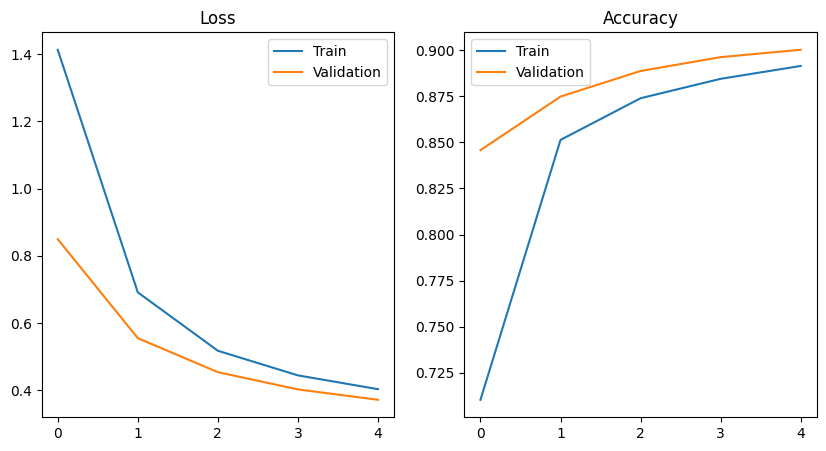

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.8841 - loss: 0.4224


In [ ]:
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

測試資料 loss: 0.372249
測試資料準確率: 0.900300


### 苗頭不對就閃人 - 早停法 (Early Stopping)
模型的訓練可以設置監控，監控的目的在於，當所監控的數值沒有隨著訓練穩定上升 (如:準確率) 或下降 (如:損失) 時，可以自動停止訓練，並讓使用者重新設定各種參數以重新訓練。

設置監控的方法很簡單，只需在模型訓練時，在 `.fit` 中的 `callbacks` 加入 `EarlyStoping` 函式即可。

更多關於好用的 Callbacks 函式，請參照: https://keras.io/callbacks/

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(X_test, y_test),
                             callbacks=[EarlyStopping(monitor='val_loss', mode='auto', patience=3)]
                             )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.8956 - loss: 0.3849 - val_categorical_accuracy: 0.9048 - val_loss: 0.3504
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.8994 - loss: 0.3638 - val_categorical_accuracy: 0.9063 - val_loss: 0.3358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8998 - loss: 0.3516 - val_categorical_accuracy: 0.9100 - val_loss: 0.3232
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9063 - loss: 0.3319 - val_categorical_accuracy: 0.9127 - val_loss: 0.3139
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.9057 - loss: 0.3273 - val_categorical_accuracy: 0.9143 - val_loss: 0.3060


## 5: 模型的儲存與載入

模型的存取有兩種方式，一種則不儲存模型架構，**僅**儲存權重，另一種是把模型架構與權重儲存下來。

**僅**儲存權重可以節省模型儲存檔的大小，但在載入時，必須要先建立同樣架構的模型，再載入模型權重。

儲存模型架構與權重的方法，則在讀取儲存檔時，會建立模型並同時載入權重。

我們將示範兩種不同的模型存取方式。

In [ ]:
from tensorflow.keras.models import load_model

### 方法一：僅儲存模型權重

我們可以透過 `.save_weights` 及 `.load_weights` 來進行模型(權重)的存取

首先，我們先建立一個用於儲存模型的資料夾

In [ ]:
!mkdir models

如此一來，我們就能將模型存在這個資料夾 ``models`` 底下

In [ ]:
model.save_weights('./models/model_weight_mnist.weights.h5')

接者，我們建立兩個新模型，一個模型與我們建立的第一個模型具有相同設計，而第二個模型則考慮不同設計

In [ ]:
new_model = Sequential()
new_model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))
new_model.add(Dense(units=10, activation='softmax'))
new_model.summary()

In [ ]:
new_model.load_weights('./models/model_weight_mnist')

In [ ]:
new_model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['categorical_accuracy'])

new_test_loss, new_test_accuracy = new_model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %new_test_loss)
print("測試資料準確率: %f" %new_test_accuracy)

In [ ]:
different_model = Sequential()
different_model.add(Dense(units=64, activation='sigmoid', input_shape=(784,)))
different_model.add(Dense(units=10, activation='softmax'))
different_model.summary()

In [ ]:
different_model.load_weights('./models/model_weight_mnist') # 會失敗，因為模型架構不同

### 方法二：儲存模型架構與權重

在此，我們透過 `.save` 及 `load_model` 來進行模型(權重)的存取

In [ ]:
model.save('./models/model_mnist.h5')

In [ ]:
new_model = load_model('./models/model_mnist.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['categorical_accuracy'])

new_test_loss, new_test_accuracy = new_model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %new_test_loss)
print("測試資料準確率: %f" %new_test_accuracy)

## 6: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
from ipywidgets import interact, BoundedIntText

In [ ]:
def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx].reshape(28, 28)
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x, 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")

In [ ]:
interact(visulization, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));